In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import lasagne
from lasagne import layers
from lasagne.updates import adam
from lasagne.nonlinearities import softmax
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet
from nolearn.lasagne import visualize

from nolearn.lasagne import TrainSplit
from nolearn.lasagne import objective

C:\Users\Chenzhao\Anaconda\lib\site-packages\theano\tensor\signal\downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


# prepare data

In [2]:
dataset = pd.read_csv('train.csv')

In [3]:
n = int(dataset.shape[0]*0.7)

In [4]:
x = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

In [5]:
x_train = x[:n, :].reshape((-1, 1, 28, 28)).astype(np.float32)
y_train = y[:n].astype(np.int32)

x_vali  = x[n:, :].reshape((-1, 1, 28, 28)).astype(np.float32)
y_vali  = y[n:].astype(np.int32)

In [6]:
dataset2 = pd.read_csv('test.csv')

In [7]:
x_test = dataset2.values.reshape((-1, 1, 28, 28)).astype(np.float32)

# visulize some digits

In [8]:
%matplotlib inline

In [9]:
plt.figure(figsize = (18, 6))

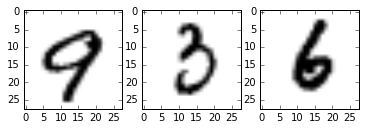

In [10]:
index = [100, 150, 160]
for i in range(len(index)):
    plt.subplot(1, 3, i+1)
    plt.imshow(x_train[index[i], 0, :, :], cmap = cm.binary)

# model 0: One input layer, one hidden layer, and one output layer

In [157]:
layer0=[(layers.InputLayer, {'shape': (None, 1, 28, 28)}),
        (layers.DenseLayer, {'num_units':1000}),
        (layers.DenseLayer, {'num_units':10, 'nonlinearity': softmax})]

In [158]:
NN0 = NeuralNet(layers = layer0,
                 max_epochs = 10,
                # optimization method:
                update=adam,
                update_learning_rate=0.0002
        )

In [159]:
NN0.fit(x_train, y_train)

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x000000000B1FA470>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x000000000B1FA320>,
     custom_scores=None,
     layers=[(<class 'lasagne.layers.input.InputLayer'>, {'shape': (None, 1, 28, 28)}), (<class 'lasagne.layers.dense.DenseLayer'>, {'num_units': 1000}), (<class 'lasagne.layers.dense.DenseLayer'>, {'num_units': 10, 'nonlinearity': <function softmax at 0x000000000AD20128>})],
     loss=None, max_epochs=10, more_params={},
     objective=<function objective at 0x000000000B1FCC88>,
     objective_loss_function=<function categorical_crossentropy at 0x000000000AF49748>,
     on_batch_finished=[], on_epoch_finished=[], on_training_finished=[],
     on_training_started=[], regression=False,
     train_split=<nolearn.lasagne.base.TrainSplit object at 0x000000000B1FA4E0>,
     update=<function adam at 0x000000000AF52208>,
     update_learning_rate=0.0002, us

In [160]:
NN0.score(x_vali, y_vali)
# the accuracy is only 0.95, lower than the score of random forest of 0.966

0.9505594794063963

# model 1: one input layer, two hidden layers, and one output layer

In [172]:
layer1=[(layers.InputLayer, {'shape': (None, 1, 28, 28)}),
        (layers.DenseLayer, {'num_units':1000}),
        (layers.DropoutLayer, {}),
        (layers.DenseLayer, {'num_units':1000}),
        (layers.DenseLayer, {'num_units':10, 'nonlinearity': softmax})]

In [173]:
NN1 = NeuralNet(layers = layer1,
                 max_epochs = 10,
                # optimization method:
                update=adam,
                update_learning_rate=0.0002)

In [174]:
NN1.fit(x_train, y_train)

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x000000000B1FA470>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x000000000B1FA320>,
     custom_scores=None,
     layers=[(<class 'lasagne.layers.input.InputLayer'>, {'shape': (None, 1, 28, 28)}), (<class 'lasagne.layers.dense.DenseLayer'>, {'num_units': 1000}), (<class 'lasagne.layers.noise.DropoutLayer'>, {}), (<class 'lasagne.layers.dense.DenseLayer'>, {'num_units': 1000}), (<class 'lasagne.layers.dense.DenseLayer'>, {'num_units': 10, 'nonlinearity': <function softmax at 0x000000000AD20128>})],
     loss=None, max_epochs=10, more_params={},
     objective=<function objective at 0x000000000B1FCC88>,
     objective_loss_function=<function categorical_crossentropy at 0x000000000AF49748>,
     on_batch_finished=[], on_epoch_finished=[], on_training_finished=[],
     on_training_started=[], regression=False,
     train_split=<nolearn.lasagne.base.TrainSplit o

In [175]:
NN1.score(x_vali, y_vali)
# the score is now 0.963, which is better than model 0 but still worse than random forest model of 0.966

0.9636536782795017

# model 2: using convolutional neural network of one stage

In [23]:
layer2=[(layers.InputLayer, {'shape': (None, 1, 28, 28)}),
        
        # first stage of our convolutional layers
        (layers.Conv2DLayer, {'num_filters': 96, 'filter_size': 5}),
        #(layers.Conv2DLayer, {'num_filters': 96, 'filter_size': 3}),
        #(layers.Conv2DLayer, {'num_filters': 96, 'filter_size': 3}),
        #(layers.Conv2DLayer, {'num_filters': 96, 'filter_size': 3}),
        #(layers.Conv2DLayer, {'num_filters': 96, 'filter_size': 3}),
        (layers.MaxPool2DLayer, {'pool_size': 2}),
        
        # second stage of our convolutional layers
        (layers.Conv2DLayer, {'num_filters': 128, 'filter_size': 3}),
        #(layers.Conv2DLayer, {'num_filters': 128, 'filter_size': 3}),
        #(layers.Conv2DLayer, {'num_filters': 128, 'filter_size': 3}),
        (layers.MaxPool2DLayer, {'pool_size': 2}),

        (layers.DenseLayer, {'num_units':1000}),
        (layers.DropoutLayer, {}),
        #(layers.DenseLayer, {'num_units':64}),
        
        (layers.DenseLayer, {'num_units':10, 'nonlinearity': softmax})]

In [24]:
NN2 = NeuralNet(layers = layer2,
                 max_epochs = 10,
                # optimization method:
                update=adam,
                update_learning_rate=0.0002)

In [25]:
NN2.fit(x_train, y_train)

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x000000000B128668>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x000000000B128518>,
     custom_scores=None,
     layers=[(<class 'lasagne.layers.input.InputLayer'>, {'shape': (None, 1, 28, 28)}), (<class 'lasagne.layers.conv.Conv2DLayer'>, {'filter_size': 5, 'num_filters': 96}), (<class 'lasagne.layers.pool.MaxPool2DLayer'>, {'pool_size': 2}), (<class 'lasagne.layers.conv.Conv2DLayer'>, {'filter_size': 3, 'num...rs.dense.DenseLayer'>, {'num_units': 10, 'nonlinearity': <function softmax at 0x000000000AC12128>})],
     loss=None, max_epochs=10, more_params={},
     objective=<function objective at 0x000000000B12AC88>,
     objective_loss_function=<function categorical_crossentropy at 0x000000000AE88748>,
     on_batch_finished=[], on_epoch_finished=[], on_training_finished=[],
     on_training_started=[], regression=False,
     train_split=<nolearn.lasagne.b

In [26]:
NN2.score(x_vali, y_vali)

0.988413617966828

In [30]:
y_predict = NN2.predict(x_test)

In [33]:
submission = pd.DataFrame({'ImageId': np.arange(x_test.shape[0]) + 1, 'label': y_predict})
submission.to_csv('submission_CNN.csv', index = False)